In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
from src.paths import TRANSFORMED_DATA_DIR, VISUALIZATIONS_DIR

In [4]:
df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'tabular_data.parquet')
df

,rides_previous_672_hour,rides_previous_671_hour,rides_previous_670_hour,rides_previous_669_hour,rides_previous_668_hour,rides_previous_667_hour,rides_previous_666_hour,rides_previous_665_hour,rides_previous_664_hour,rides_previous_663_hour,...,rides_previous_7_hour,rides_previous_6_hour,rides_previous_5_hour,rides_previous_4_hour,rides_previous_3_hour,rides_previous_2_hour,rides_previous_1_hour,pickup_hour,pickup_location_id,target_rides_next_hour
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-01-29,1,0.0
1,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,2.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2023-01-30,1,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2023-01-31,1,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-02-01,1,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2023-02-02,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89300,1.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,3.0,2.0,...,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2023-12-27,265,3.0
89301,5.0,7.0,2.0,1.0,0.0,1.0,2.0,2.0,3.0,3.0,...,6.0,4.0,2.0,4.0,10.0,3.0,3.0,2023-12-28,265,1.0
89302,5.0,3.0,2.0,3.0,1.0,3.0,1.0,5.0,3.0,1.0,...,3.0,1.0,8.0,5.0,1.0,0.0,6.0,2023-12-29,265,5.0
89303,3.0,4.0,9.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,...,6.0,3.0,2.0,2.0,5.0,1.0,5.0,2023-12-30,265,2.0


In [5]:
from src.data_split import train_test_split

In [6]:
X_train, y_train, X_test, y_test = train_test_split(df, 
                                                    cutoff_date=datetime(2023, 6, 1, 0, 0, 0),
                                                    target_column_name='target_rides_next_hour')

In [7]:
print(f'Datasets shapes')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Datasets shapes
X_train: (32595, 674)
y_train: (32595,)
X_test: (56710, 674)
y_test: (56710,)


In [8]:
class BaselineModelPreviousHour:
   
   '''
   Prediction = actual demand from the previous hour
   '''

   def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
      pass
   
   def predict(self, X_test: pd.DataFrame) -> np.array:
      return X_test[f'rides_previous_1_hour']

In [9]:
model = BaselineModelPreviousHour()
predictions = model.predict(X_test)
predictions

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
56705    3.0
56706    3.0
56707    6.0
56708    5.0
56709    0.0
Name: rides_previous_1_hour, Length: 56710, dtype: float32

In [10]:
baseline_ph = predictions.copy() # previous hour
baseline_ph_residuals = y_test - baseline_ph # previous hour residuals
residuals = baseline_ph_residuals.copy()

In [11]:
from src.evaluation import evaluate_metrics, save_metrics

In [12]:
metrics = evaluate_metrics(y_test, predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

MAE: 6.52
MSE: 501.65
RMSE: 22.40
SMAPE: 100.81
R: 0.91
R-squared: 0.67


In [13]:
model_name = 'Baseline (Previous Hour)'
metrics['Model'] = model_name
save_metrics(metrics)

In [14]:
from src.plot import plot_actual_predicted_scatter

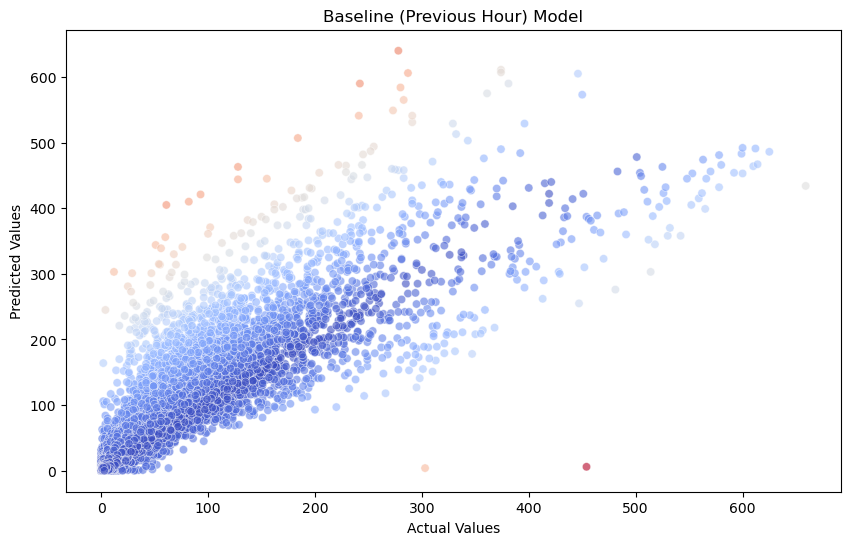

In [15]:
title = 'Baseline (Previous Hour) Model'
file_name = 'baseline_previous_hour_scatter.png'
output_dir = VISUALIZATIONS_DIR

plot_actual_predicted_scatter(y_test, predictions, residuals, output_dir, title, file_name)

In [16]:
class BaselineModelPreviousWeek:
   
   '''
   Prediction = actual demand from the t - 7 days
   '''

   def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
      pass
   
   def predict(self, X_test: pd.DataFrame) -> np.array:
      return X_test[f'rides_previous_{7*24}_hour']

In [17]:
model = BaselineModelPreviousWeek()
predictions = model.predict(X_test)

In [18]:
baseline_pw = predictions.copy() # previous week
baseline_pw_residuals = y_test - baseline_pw # previous week residuals
residuals = baseline_pw_residuals.copy()

In [19]:
metrics = evaluate_metrics(y_test, predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

MAE: 4.46
MSE: 348.22
RMSE: 18.66
SMAPE: 95.34
R: 0.89
R-squared: 0.77


In [20]:
model_name = 'Baseline (Previous Week)'
metrics['Model'] = model_name
save_metrics(metrics)

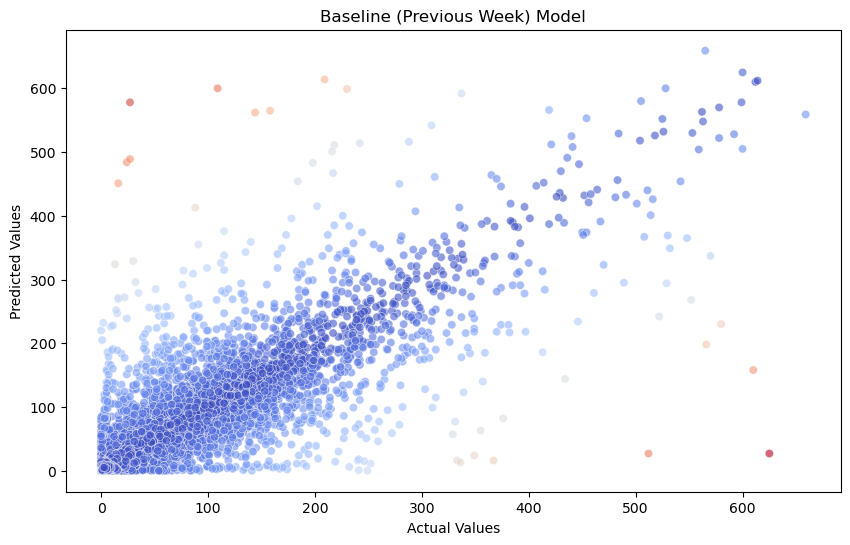

In [21]:
title = 'Baseline (Previous Week) Model'
file_name = 'baseline_previous_week_scatter.png'
output_dir = VISUALIZATIONS_DIR

plot_actual_predicted_scatter(y_test, predictions, residuals, output_dir, title, file_name)

In [22]:
class BaselineModelLast4Weeks:
   
   '''
   Prediction = actual demand from the t - 7 days, t - 14 days, t - 21 days, t - 28 days
   '''

   def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
      pass
   
   def predict(self, X_test: pd.DataFrame) -> np.array:
      return 0.25*(X_test[f'rides_previous_{7*24}_hour'] + \
                   X_test[f'rides_previous_{14*24}_hour'] + \
                   X_test[f'rides_previous_{21*24}_hour'] + \
                   X_test[f'rides_previous_{28*24}_hour'])

In [23]:
model = BaselineModelLast4Weeks()
predictions = model.predict(X_test)

In [24]:
baseline_p4w = predictions.copy() # previous four weeks
baseline_p4w_residuals = y_test - baseline_p4w # previous four weeks residuals
residuals = baseline_p4w_residuals.copy()

In [25]:
metrics = evaluate_metrics(y_test, predictions)

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

MAE: 3.84
MSE: 231.28
RMSE: 15.21
SMAPE: 105.99
R: 0.92
R-squared: 0.85


In [26]:
model_name = 'Baseline (Previous Last 4 Weeks)'
metrics['Model'] = model_name
save_metrics(metrics)

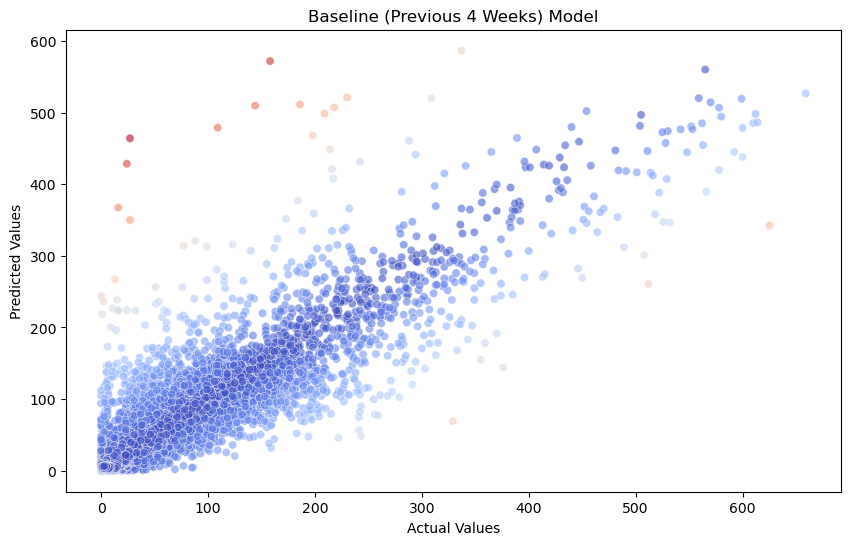

In [27]:
title = 'Baseline (Previous 4 Weeks) Model'
file_name = 'baseline_previous_4weeks_scatter.png'
output_dir = VISUALIZATIONS_DIR

plot_actual_predicted_scatter(y_test, predictions, residuals, output_dir, title, file_name)

/Users/cmartinez/anaconda3/envs/python39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cmartinez/anaconda3/envs/python39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cmartinez/anaconda3/envs/python39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


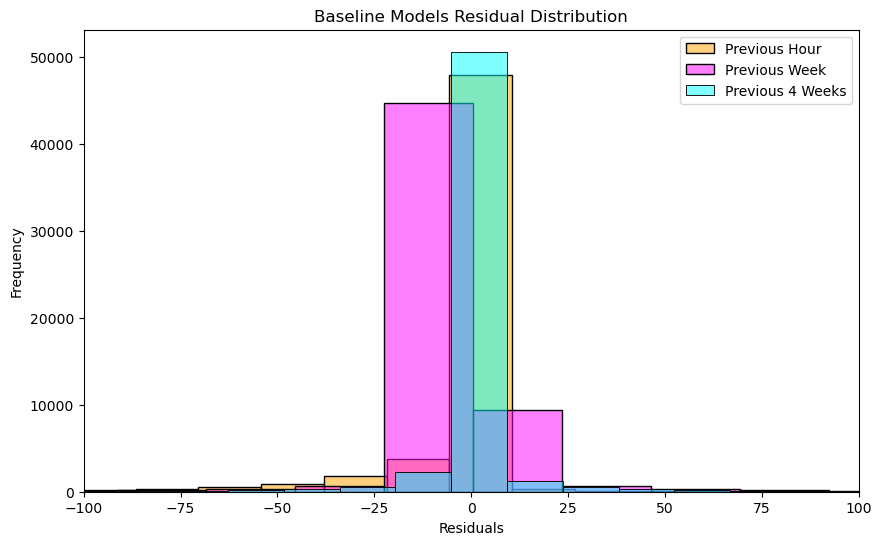

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(baseline_ph_residuals, bins=50, color='orange', label='Previous Hour', alpha=0.5)
sns.histplot(baseline_pw_residuals, bins=50, color='magenta', label='Previous Week', alpha=0.5)
sns.histplot(baseline_p4w_residuals, bins=50, color='cyan', label='Previous 4 Weeks', alpha=0.5)
plt.xlim(-100, 100)
plt.title('Baseline Models Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(VISUALIZATIONS_DIR / 'baseline_residuals.png')
plt.show()